<a href="https://colab.research.google.com/github/Chandramani05/Amazon-Fine-Food-EDA-And-Review-using-NLP/blob/main/Amazon_Fine_Food_Reviews_EDA_And_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [8]:
# importing wordcloud library
from wordcloud import WordCloud, STOPWORDS
# importing stopwords
from nltk.corpus import stopwords

##Extracting the data from text to dataframe

In [9]:
with open('/content/drive/MyDrive/Amazon Fine Food/finefoods 2.txt','r', encoding='latin-1') as f:
    data = f.read()
columns_list=['product/productId',
 'review/helpfulness',
 'review/profileName',
 'review/score',
 'review/summary',
 'review/text',
 'review/time',
 'review/userId']

df=pd.DataFrame([
    {line.split(': ')[0]:': '.join(line.split(': ')[1:]) 
     for line in record.split('\n') if line.split(': ')[0] in columns_list}
    for record in data.split('\n\n')])

In [10]:
df =df.rename(columns={'product/productId' : 'ProductId', 'review/userId' : 'UserId' ,
                       'review/profileName' : 'ProfileName', 'review/helpfulness' : 'Helpfulness',
                       'review/score' : 'Score','review/time': 'Time', 'review/summary' : 'Summary',
                       'review/text' :'Text'})
df

,ProductId,UserId,ProfileName,Helpfulness,Score,Time,Summary,Text
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1/1,5.0,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0/0,1.0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1/1,4.0,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,B000UA0QIQ,A395BORC6FGVXV,Karl,3/3,2.0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0/0,5.0,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...
568450,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0/0,2.0,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2/2,5.0,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1/1,5.0,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...
568453,B001LR2CU2,A3LGQPJCZVL9UC,srfell17,0/0,5.0,1338422400,Great Honey,"I am very satisfied ,product is as advertised,..."


#Data Analysis

In [11]:
fontdict = {
    'weight' : 'bold', 'size' : '12'
}

##Get Mean/Median/Percentile/Standard Deviation information

In [12]:
df.describe()

,ProductId,UserId,ProfileName,Helpfulness,Score,Time,Summary,Text
count,568454,568454,568454,568454,568454,568454,568454,568454
unique,74258,256059,218418,1571,5,3168,295744,393579
top,B007JFMH8M,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",0/0,5.0,1350345600,Delicious!,"This review will make me sound really stupid, ..."
freq,913,448,451,270052,363122,1143,2462,199


In [13]:
df.isna().sum()

ProductId      1
UserId         1
ProfileName    1
Helpfulness    1
Score          1
Time           1
Summary        1
Text           1
dtype: int64

###Removing the Null row

In [14]:
df = df[df['Score'].notna()]
df.isna().sum()

ProductId      0
UserId         0
ProfileName    0
Helpfulness    0
Score          0
Time           0
Summary        0
Text           0
dtype: int64

##Distribution of Ratings

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Score')

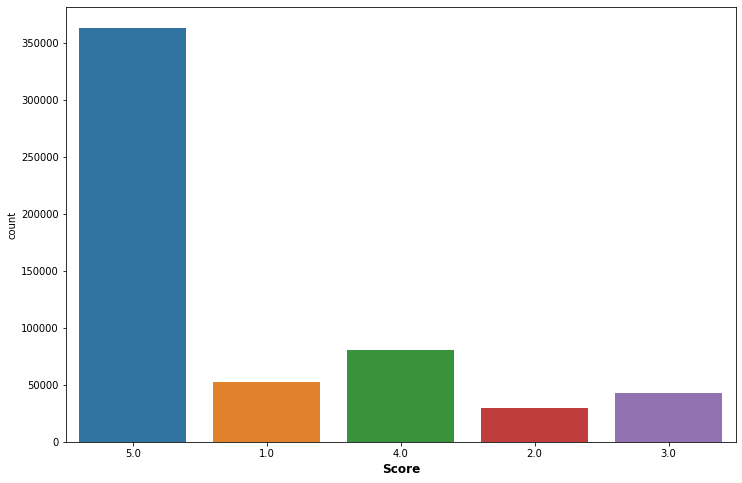

In [15]:
plt.figure(figsize=(12,8)) 
ax = sns.countplot(df.Score)
ax.set_xlabel("Score", fontdict = fontdict)

 **5 star review constitute a large proportion(64%) of all reviews. The next most review is 4 star(14%) followed by 1 star(9%),3 star(7%) and finally 2 star(5%)
lets consider**


*  Positive review (4-5 Rating)
*   Negative review (1-2 Rating)



In [16]:
# removing 3 score from dataframe
df3 = df[df.Score != '3.0']

In [17]:
df3.Score.value_counts()

5.0    363122
4.0     80655
1.0     52268
2.0     29769
Name: Score, dtype: int64

In [18]:
df3['Score'] = pd.to_numeric(df3['Score'])

<ipython-input-18-811b91140c68>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Score'] = pd.to_numeric(df3['Score'])


In [19]:
# mapping the positive and negative to Score based on condition
df3['Rating'] = df3.Score.apply(lambda x :  'Positive'    if x == 5.0 or x == 4.0 else 'Negative')

<ipython-input-19-09292ded98dc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Rating'] = df3.Score.apply(lambda x :  'Positive'    if x == 5.0 or x == 4.0 else 'Negative')


In [20]:
df3.head()

,ProductId,UserId,ProfileName,Helpfulness,Score,Time,Summary,Text,Rating
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1/1,5.0,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Positive
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0/0,1.0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Negative
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1/1,4.0,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,Positive
3,B000UA0QIQ,A395BORC6FGVXV,Karl,3/3,2.0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,Negative
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0/0,5.0,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Positive


##Value Counts of Rating

In [21]:
# checking the value_counts of Rating
df3.Rating.value_counts()

Positive    443777
Negative     82037
Name: Rating, dtype: int64

##Pouplar Words in Positive Reviews

In [22]:
# creating new df positive
positive = df3[df3.Rating == 'Positive']['Text']
positive

0         I have bought several of the Vitality canned d...
2         This is a confection that has been around a fe...
4         Great taffy at a great price.  There was a wid...
5         I got a wild hair for taffy and ordered this f...
6         This saltwater taffy had great flavors and was...
                                ...                        
568448    My only complaint is that there's so much of i...
568449    Great for sesame chicken..this is a good if no...
568451    These stars are small, so you can give 10-15 o...
568452    These are the BEST treats for training and rew...
568453    I am very satisfied ,product is as advertised,...
Name: Text, Length: 443777, dtype: object

In [23]:
# joing the positive text
text_postive = ' '.join(positive)

In [24]:
# removing 'br' from text
cleaned_positve = ' '.join([word for word in text_postive.split()
                       if 'br' not in word])


###Creating positive wordcloud



In [25]:
positive_wordcloud = WordCloud(stopwords = stopwords.words('english'),
                          background_color='White',
                          width=1600,
                          height=800).generate(cleaned_positve)

### Plotting wordcount of positive text

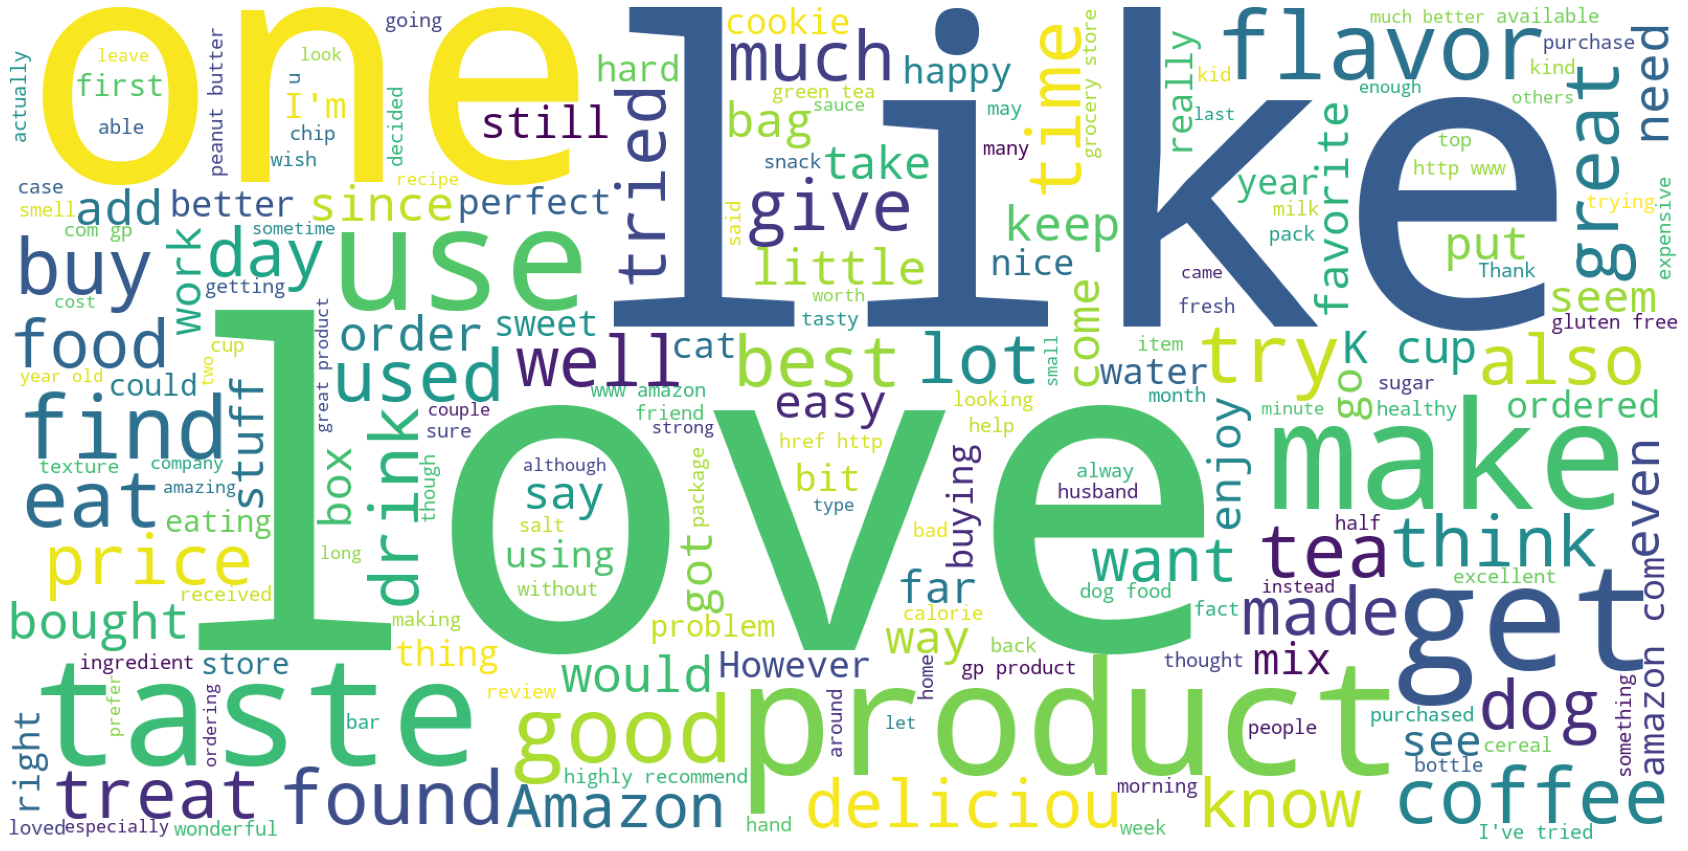

In [26]:
plt.figure(1,figsize=(30,20))
plt.imshow(positive_wordcloud)
plt.axis('off')
plt.show()


##Popular words in Negative Reviews (1-2 Rating)

###Creating negative dataframe

In [27]:
Negative = df3[df3.Rating == 'Negative']['Text']

In [28]:
# joining and cleaning negative text
text_negative = ' '.join(Negative)
cleaned_negative = ' '.join([word for word in text_negative.split()
                       if 'br' not in word])


###Creating negative wordcloud

In [29]:
negative_wordcloud = WordCloud(stopwords = stopwords.words('english'),
                          background_color='White',
                          width=1600,
                          height=800).generate(cleaned_negative)

###Plotting Negative Worldcloud

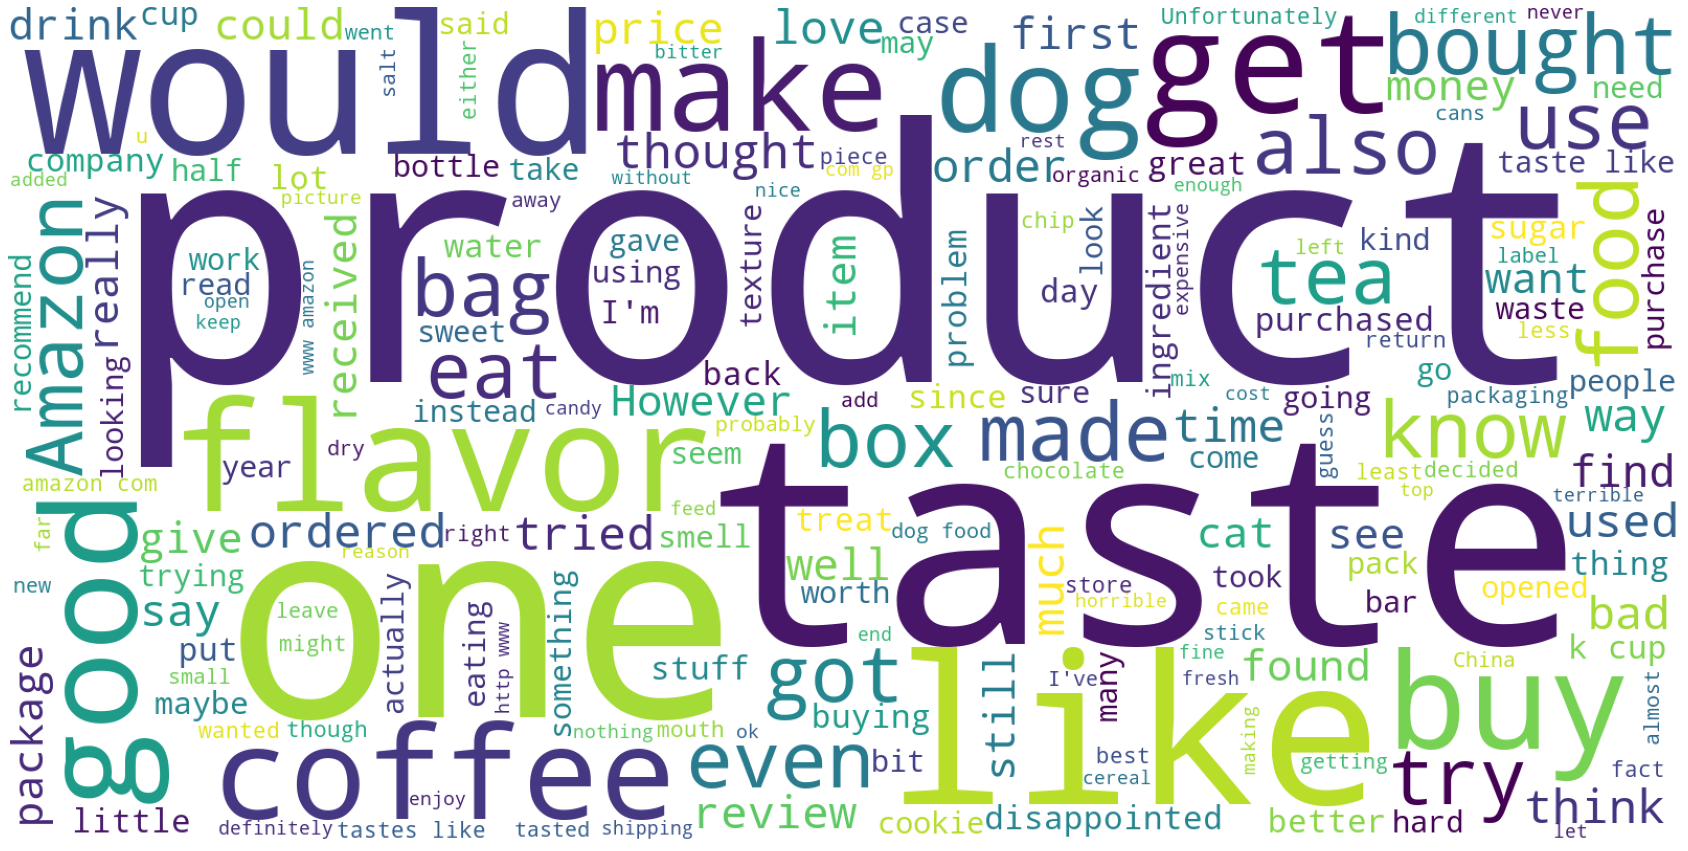

In [30]:
plt.figure(1,figsize=(30,20))
plt.imshow(negative_wordcloud)
plt.axis('off')
plt.show()


##Helpfulness

In [31]:
def convert_to_float(frac_str):
    try:
        return float(frac_str)
    except ValueError:
        num, denom = frac_str.split('/')
        denom1 = float(denom)
        if denom1 == 0 : return np.NaN
        try:
            leading, num = num.split(' ')
            whole = float(leading)
        except ValueError:
            whole = 0
        frac = float(num) / float(denom)
        return whole - frac if whole < 0 else whole + frac


In [32]:
Helpful = df3["Helpfulness"].apply(lambda x:convert_to_float(x))
Helpful

0         1.0
1         NaN
2         1.0
3         1.0
4         NaN
         ... 
568449    NaN
568450    NaN
568451    1.0
568452    1.0
568453    NaN
Name: Helpfulness, Length: 525814, dtype: float64

In [33]:
Helpful = Helpful*100
Helpful

0         100.0
1           NaN
2         100.0
3         100.0
4           NaN
          ...  
568449      NaN
568450      NaN
568451    100.0
568452    100.0
568453      NaN
Name: Helpfulness, Length: 525814, dtype: float64

**Divide this Helpful into four categories**


*   No Indication(not voted at all)
*   Helpful reviews had more than 75% of voters find the review helpful
*   Unhelpful reviews had less than 25% of voters find the review helpful
*  Intermediate group of 25-75% helpfulness






In [34]:
# creating dataframe of helpful
Helpful = pd.DataFrame(Helpful)

In [35]:
# creating column in df helpful
Helpful.columns = ['Helpfullness']

In [36]:
# creating helpful_cat function to differentiate helpfulness
def helpful_cat(x):
    if x > 75:
        return 'Helpful'
    elif x < 25:
        return 'Unhelpful'
    elif x >= 25 and x <= 75:
        return 'Intermediate'
    else:
        return 'No indication'
# applying the function to helpful dataframe
Helpful['category'] = Helpful['Helpfullness'].apply(helpful_cat)        

In [37]:
Helpful.head()

,Helpfullness,category
0,100.0,Helpful
1,NaN,No indication
2,100.0,Helpful
3,100.0,Helpful
4,NaN,No indication


###Value Counts

In [38]:
Helpful.category.value_counts(normalize=True)

No indication    0.478551
Helpful          0.363817
Intermediate     0.095408
Unhelpful        0.062224
Name: category, dtype: float64

###Distributon of Helpfulness

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'No indication'),
 Text(0, 0, 'Helpful'),
 Text(0, 0, 'Intermediate'),
 Text(0, 0, 'Unhelpful')]

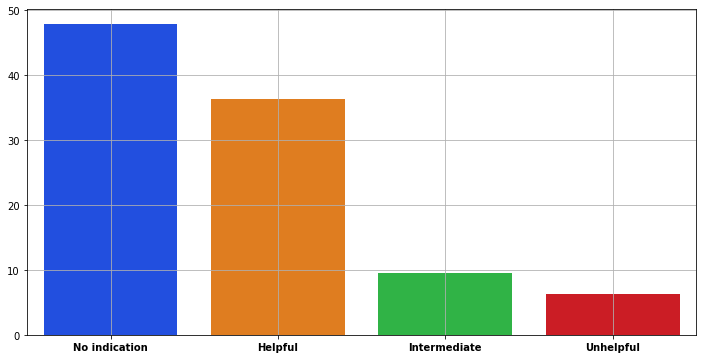

In [39]:
height = Helpful.category.value_counts(normalize=True).values*100
bars = Helpful.category.value_counts(normalize=True).index
plt.figure(figsize=(12, 6))
ax = sns.barplot(bars, height, palette='bright')
plt.grid()
ax.set_xticklabels(bars, fontdict = {'weight' : 'bold'})

###Merging all dataframe

In [40]:
# copy df3 into df4
df4 = df3.copy()
# concat helpful and df4
df4 = pd.concat([df4,Helpful],axis = 1)
df4.head()

,ProductId,UserId,ProfileName,Helpfulness,Score,Time,Summary,Text,Rating,Helpfullness,category
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1/1,5.0,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Positive,100.0,Helpful
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0/0,1.0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Negative,NaN,No indication
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1/1,4.0,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,Positive,100.0,Helpful
3,B000UA0QIQ,A395BORC6FGVXV,Karl,3/3,2.0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,Negative,100.0,Helpful
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0/0,5.0,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Positive,NaN,No indication


In [41]:

# removing no indication from df4
df4 = df4[df4.category != 'No indication']

In [42]:
df4.shape

(274185, 11)

###How does rating affect Helpfulness

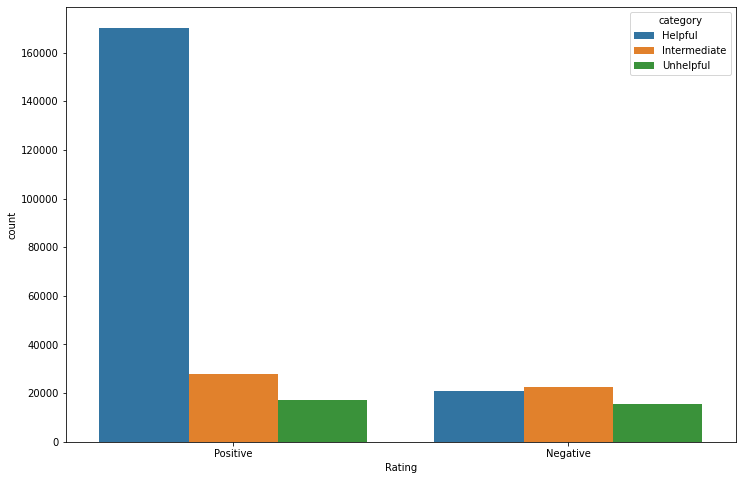

In [43]:
plt.figure(figsize = (12, 8))

sns.countplot(x='Rating', hue='category', order=["Positive", "Negative"], 
              hue_order=['Helpful', 'Intermediate', 'Unhelpful'], data=df4)
plt.xlabel('Rating')
plt.show()


Thus as the rating becomes more positive the reviews become more helpful

##Word Count

In [44]:
import re

In [45]:
# creating wordcount function
def word_count(x):
    res = len(re.findall(r'\w+',x))
    return res


In [46]:
df5 = df.copy()

In [47]:
# applying the wordcount function reviewtext column
df5['Wordcount'] = df5.Text.apply(word_count)

In [48]:
df5.head()

,ProductId,UserId,ProfileName,Helpfulness,Score,Time,Summary,Text,Wordcount
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1/1,5.0,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,48
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0/0,1.0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,32
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1/1,4.0,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,93
3,B000UA0QIQ,A395BORC6FGVXV,Karl,3/3,2.0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,41
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0/0,5.0,1350777600,Great taffy,Great taffy at a great price. There was a wid...,27


##Rating Varying By Word Count

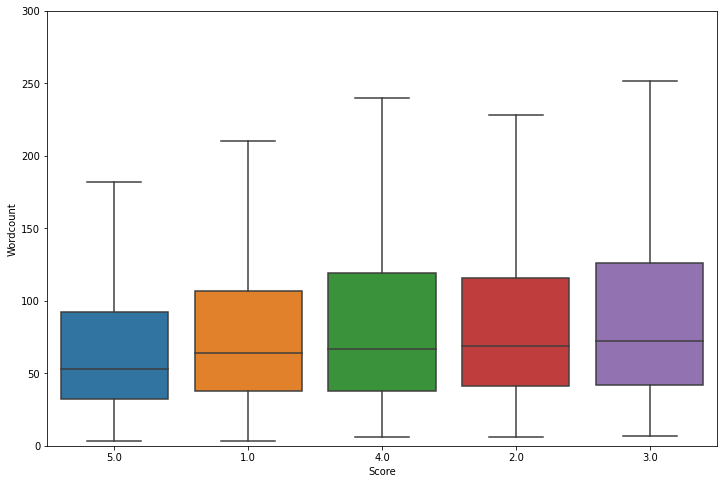

In [49]:
# plotting word count v/s score 
plt.figure(figsize=(12,8))
ax = sns.boxplot(x = 'Score',y = 'Wordcount',data = df5, showfliers=False)

plt.ylim(0,300)
plt.show()

In [50]:
df4.head()

,ProductId,UserId,ProfileName,Helpfulness,Score,Time,Summary,Text,Rating,Helpfullness,category
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1/1,5.0,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Positive,100.0,Helpful
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1/1,4.0,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,Positive,100.0,Helpful
3,B000UA0QIQ,A395BORC6FGVXV,Karl,3/3,2.0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,Negative,100.0,Helpful
8,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1/1,5.0,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...,Positive,100.0,Helpful
10,B0001PB9FE,A3HDKO7OW0QNK4,Canadian Fan,1/1,5.0,1107820800,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...,Positive,100.0,Helpful


In [51]:
df4['Wordcount'] = df4.Text.apply(word_count)

###Word Count to Helpfulness

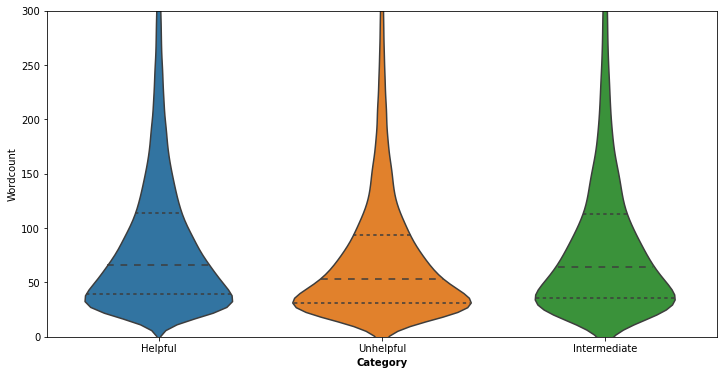

In [52]:
plt.figure(figsize=(12,6))
ax = sns.violinplot(x = 'category',y = 'Wordcount',data = df4,gridsize=500,inner='quartile')
ax.set_xlabel("Category", fontdict = {'weight' : 'bold', 'size' : '10'})
plt.ylim(0,300)
plt.show()

Helpful reviews have a higher median word count (67 words) than not helpful reviews (54 words) and intermediate have almost same as helpful.

##Frequency of Reviewers

In [53]:
# creating dictionary of userid valuecounts
x = df5.UserId.value_counts()
x.to_dict()
print(x)

A3OXHLG6DIBRW8    448
A1YUL9PCJR3JTY    421
AY12DBB0U420B     389
A281NPSIMI1C2R    365
A1Z54EM24Y40LL    256
                 ... 
A2O8OFVSTO9PF3      1
A1C6KXG47GAQ7B      1
A1TU5DS89D9OVD      1
A3N005JS5FG5FI      1
A3LGQPJCZVL9UC      1
Name: UserId, Length: 256059, dtype: int64


In [54]:
# applying the frequency to userid
df5['reviewerfrequency'] = df5.UserId.apply(lambda index :  "Frequent" if x[index] > 50 else "Not Frequent")

In [55]:
df5.head()

,ProductId,UserId,ProfileName,Helpfulness,Score,Time,Summary,Text,Wordcount,reviewerfrequency
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1/1,5.0,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,48,Not Frequent
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0/0,1.0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,32,Not Frequent
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1/1,4.0,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,93,Not Frequent
3,B000UA0QIQ,A395BORC6FGVXV,Karl,3/3,2.0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,41,Not Frequent
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0/0,5.0,1350777600,Great taffy,Great taffy at a great price. There was a wid...,27,Not Frequent


###Judgement of the Frequent Reviewers

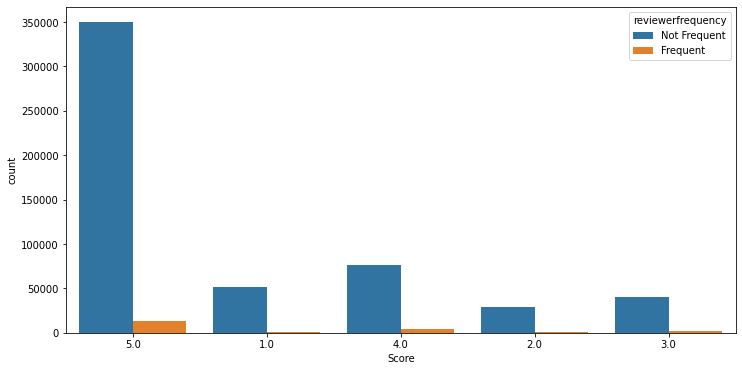

In [56]:
# plotting countplot of score with hue reviewer frequency
plt.figure(figsize = (12, 6))
sns.countplot(x = 'Score',data = df5,hue = 'reviewerfrequency')

The frequent reviewers give less 5-star reviews and less 1-star review. Frequent users appear to be more discerning in the sense that they give less extreme reviews than infrequent reviews

In [57]:
x = df4.UserId.value_counts()
x.to_dict()
print(x)


A1YUL9PCJR3JTY    342
A281NPSIMI1C2R    227
A3OXHLG6DIBRW8    216
A3TVZM3ZIXG8YW    199
AY12DBB0U420B     151
                 ... 
AFH0NVLPB9942       1
AKHJO0EJYKVAD       1
A1ZI3B7NBPTLCS      1
A2DMNKPJ66FGSF      1
A3IBEVCTXKNOH       1
Name: UserId, Length: 141178, dtype: int64


In [58]:
df4['reviewerfrequency'] = df4.UserId.apply(lambda index :  "Frequent" if x[index] > 50 else "Not Frequent")

###Are frequent reviewers more helpful?

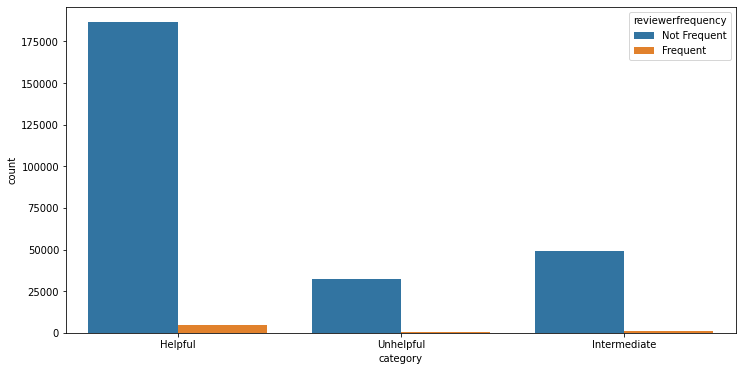

In [59]:
# creating count plot of helpfulness with hue of reviewerfrequency
plt.figure(figsize = (12, 6))
sns.countplot(x = 'category',data = df4,hue = 'reviewerfrequency')

frequent reviewers are more likely to have their review voted on and when voted on more likely to be voted helpful, and less likely to be unhelpful


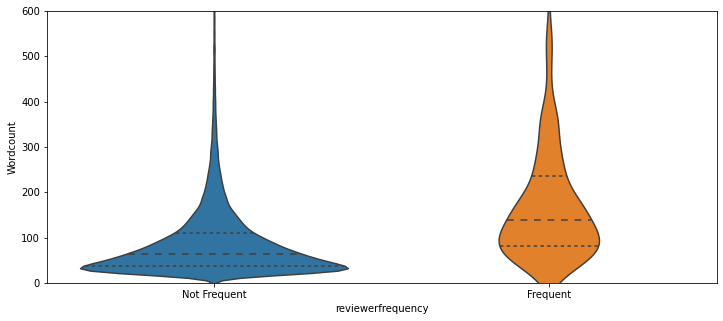

In [60]:
# create violinplot of reviewerfrequency v/s word count
plt.figure(figsize=(12,5))
sns.violinplot(x = 'reviewerfrequency',y = 'Wordcount',data = df4,gridsize=500,inner='quartile')
plt.ylim(0,600)
plt.show()


The distributions of word counts for frequent and infrequent reviews shows that infrequent reviewers have a large amount of reviews of low word count. On the other hand, the largest concentration of word count is higher for frequent reviewers than for infrequent reviews. Moreover, the median word count for frequent reviewers is higher than the median for infrequent reviewers

#Machine Learning Model

In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn import datasets, neighbors
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from collections import Counter
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score
import math
import nltk
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

##Naive Bays

###Preprocessing

In [62]:
#Get the number of duplicate entries in the dataset.
df.duplicated(subset={"UserId","ProfileName","Time","Text"}).value_counts()

False    393933
True     174521
dtype: int64

There exist a lot of duplicates (161641) where the different products is reviewed by same user at the same time stamp. The product ID may be different but the product is similar with different variant

In [63]:
df4.head()

,ProductId,UserId,ProfileName,Helpfulness,Score,Time,Summary,Text,Rating,Helpfullness,category,Wordcount,reviewerfrequency
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1/1,5.0,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Positive,100.0,Helpful,48,Not Frequent
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1/1,4.0,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,Positive,100.0,Helpful,93,Not Frequent
3,B000UA0QIQ,A395BORC6FGVXV,Karl,3/3,2.0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,Negative,100.0,Helpful,41,Not Frequent
8,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1/1,5.0,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...,Positive,100.0,Helpful,27,Not Frequent
10,B0001PB9FE,A3HDKO7OW0QNK4,Canadian Fan,1/1,5.0,1107820800,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...,Positive,100.0,Helpful,154,Not Frequent


In [64]:
#Removing duplicate entries based on past knowledge.
filtered_duplicates=df4.drop_duplicates(subset={"UserId","ProfileName","Time","Text"}, keep='first', inplace=False)

In [65]:
filtered_data = df4.copy()

In [66]:
#Checking to see how much % of data still remains.
print("\nChecking to see how much percentage of data still remains.")
retained_per = (filtered_duplicates['Rating'].size*1.0)/(filtered_data['Rating'].size*1.0)*100
removed_per = 100 - retained_per
print("Percentage of redundant data removed : {}".format(np.round(removed_per,2)))
print("Percentage of original data retained : {}".format(np.round(retained_per,2)))



Checking to see how much percentage of data still remains.
Percentage of redundant data removed : 29.6
Percentage of original data retained : 70.4


In [67]:
filtered_duplicates.columns

Index(['ProductId', 'UserId', 'ProfileName', 'Helpfulness', 'Score', 'Time',
       'Summary', 'Text', 'Rating', 'Helpfullness', 'category', 'Wordcount',
       'reviewerfrequency'],
      dtype='object')

In [68]:
final_data = filtered_duplicates[['ProductId', 'UserId', 'ProfileName', 'Score', 'Time',
       'Summary', 'Text', 'Rating', 'Helpfullness', 'category', 'Wordcount',
       'reviewerfrequency']]

In [69]:
print("Total number of unique users: ",len(set(list(final_data.UserId))))
print("Total number of unique products: ",len(set(list(final_data.ProductId))))

Total number of unique users:  141178
Total number of unique products:  42935


###Text PreProcessing

In [70]:
import re

Removing numbers urls, html etc..

In [71]:
#Function to clean html tags from a sentence

def removeHtml(sentence): 
    pattern = re.compile('<.*?>')
    cleaned_text = re.sub(pattern,' ',sentence)
    return cleaned_text

removeHtml('I Want This text!<>')

##Punctuation Removal
def removePunctuations(sentence):
    cleaned_text  = re.sub('[^a-zA-Z]',' ',sentence)
    return (cleaned_text)

#Removing of words with Numbers
def removeNumbers(sentence):
    sentence = re.sub("\S*\d\S*", " ", sentence).strip()
    return (sentence)

#Removing URL from sentences
def removeURL(sentence):
    text = re.sub(r"http\S+", " ", sentence)
    sentence = re.sub(r"www.\S+", " ", text)
    return (sentence) 

#https://stackoverflow.com/questions/37012948/regex-to-match-an-entire-word-that-contains-repeated-character
#Remove words like 'zzzzzzzzzzzzzzzzzzzzzzz', 'testtting', 'grrrrrrreeeettttt' etc. Preserves words like 'looks', 'goods', 'soon' etc. We will remove all such words which has three consecutive repeating characters.
def removePatterns(sentence): 
    cleaned_text  = re.sub("\\s*\\b(?=\\w*(\\w)\\1{2,})\\w*\\b",' ',sentence)
    return (cleaned_text)

removePatterns("This looks soooooooo good! I am so happpyyy")

'This looks  good! I am so '

In [72]:
# https://stackoverflow.com/a/47091490/4084039
# https://en.wikipedia.org/wiki/Wikipedia:List_of_English_contractions
import re

#Expand the reviews x is aninput string of any length. Convert all the words to lower case
def decontracted(x):
    x = str(x).lower()
    x = x.replace(",000,000", " m").replace(",000", " k").replace("′", "'").replace("’", "'")\
                           .replace("won't", " will not").replace("cannot", " can not").replace("can't", " can not")\
                           .replace("n't", " not").replace("what's", " what is").replace("it's", " it is")\
                           .replace("'ve", " have").replace("'m", " am").replace("'re", " are")\
                           .replace("he's", " he is").replace("she's", " she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will").replace("how's"," how has").replace("y'all"," you all")\
                           .replace("o'clock"," of the clock").replace("ne'er"," never").replace("let's"," let us")\
                           .replace("finna"," fixing to").replace("gonna"," going to").replace("gimme"," give me").replace("gotta"," got to").replace("'d"," would")\
                           .replace("daresn't"," dare not").replace("dasn't"," dare not").replace("e'er"," ever").replace("everyone's"," everyone is")\
                           .replace("'cause'"," because")
    
    x = re.sub(r"([0-9]+)000000", r"\1m", x)
    x = re.sub(r"([0-9]+)000", r"\1k", x)
    return x


###StopWords

In [73]:
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer



#Stemming and stopwords removal
from nltk.stem.snowball import SnowballStemmer
sno = SnowballStemmer(language='english')

#Removing the word 'not' from stopwords
default_stopwords = set(stopwords.words('english'))
#excluding some useful words from stop words list as we doing sentiment analysis
excluding = set(['against','not','don', "don't",'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't",
             'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 
             'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't",'shouldn', "shouldn't", 'wasn',
             "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"])

custom_stopwords = default_stopwords - excluding

print(custom_stopwords)

{"you'd", 'them', 'what', 'an', 'after', 'off', 'further', 'why', 'have', 'down', 'each', 'we', 'above', 'and', 'that', 'very', 'will', 'can', "that'll", "you'll", 'are', 'both', 'it', 'these', 'ma', 'again', 'over', 'on', 'doing', 'from', 'there', 'to', 'm', 'which', "shan't", 'been', 'as', 'll', 'too', 'nor', 'her', 'so', 'himself', 'out', 'up', 'does', 'below', 'ourselves', 'ours', "it's", 'with', 'i', 'this', 'theirs', 'should', 'no', 'myself', 'the', 'by', 'between', "you've", 'because', 'but', 'itself', 'now', 'hers', "she's", 'than', 'into', 'just', "should've", 'other', 'during', 'yourselves', 'has', 'some', 'only', 'yourself', 's', 'did', 'about', 'until', 'our', 'how', 'herself', 'were', 'themselves', 'having', 've', 't', 'all', 'its', 'was', 'where', 're', 'then', 'being', 'do', 'at', 'those', 'shan', 'in', 'once', 'of', 'when', 'am', 'him', 'any', 'had', 'yours', 'be', 'through', 'his', 'such', 'he', 'o', 'd', 'their', 'if', 'while', 'y', 'most', 'for', "you're", 'she', 'ow

In [74]:
from nltk.stem import SnowballStemmer
snow = SnowballStemmer('english') #initialising the snowball stemmer
print("Stem/Root words of the some of the words using SnowBall Stemmer:")
print(snow.stem('tasty'))
print(snow.stem('tasteful'))
print(snow.stem('tastiest'))
print(snow.stem('delicious'))
print(snow.stem('amazing'))
print(snow.stem('amaze'))
print(snow.stem('initialize'))
print(snow.stem('fabulous'))
print(snow.stem('Honda City'))
print(snow.stem('unpleasant'))

Stem/Root words of the some of the words using SnowBall Stemmer:
tasti
tast
tastiest
delici
amaz
amaz
initi
fabul
honda c
unpleas


100%|██████████| 55611/55611 [00:00<00:00, 1074916.89it/s]


Text(0, 0.5, 'Number of Words')

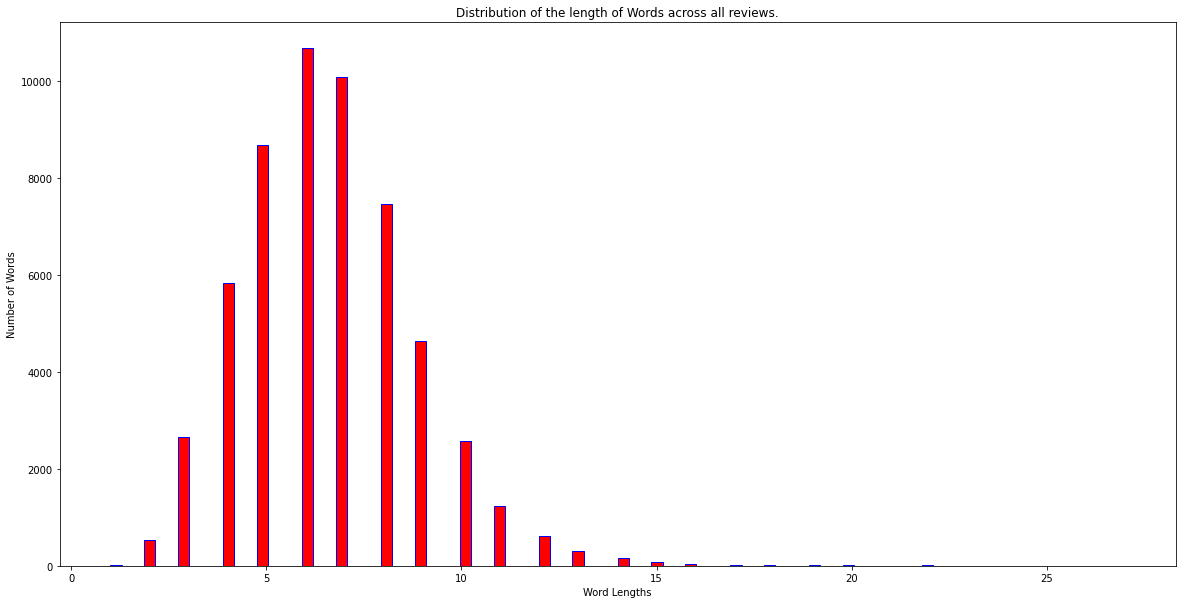

In [75]:
#We will check the distribution of stemmed word lengths across the whole review dataset to understand what is the length of the maximum number of words we will consider for the word to be relevant.
#In other words we will keep only those words which has a length less than that of a speicific length (we will obtain this specific length from the histogram).
from tqdm import tqdm
total_words = []

for review in tqdm(final_data['Text'].values):
    filtered_sentence=[]
    review = decontracted(review)
    review = removeNumbers(review)
    review = removeHtml(review)
    review = removeURL(review)
    review = removePunctuations(review)
    review = removePatterns(review)
    
    for cleaned_words in review.split():   
        if((cleaned_words not in custom_stopwords)):          
            stemed_word=(sno.stem(cleaned_words.lower()))
            total_words.append(stemed_word)

total_words = list(set(total_words)) #Get list of unique words.

#A list to hold the length of each words used in all the reviews used across the whole dataset.
dist = []
for i in tqdm(total_words):
    length = len(i)
    dist.append(length)

# matplotlib histogram to see the distribution of the length of words
plt.figure(figsize=(20,10))
plt.hist(dist, color = 'red', edgecolor = 'blue', bins =90)
plt.title('Distribution of the length of Words across all reviews.')
plt.xlabel('Word Lengths')
plt.ylabel('Number of Words')


In [76]:
final_data

,ProductId,UserId,ProfileName,Score,Time,Summary,Text,Rating,Helpfullness,category,Wordcount,reviewerfrequency
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,5.0,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Positive,100.0,Helpful,48,Not Frequent
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",4.0,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,Positive,100.0,Helpful,93,Not Frequent
3,B000UA0QIQ,A395BORC6FGVXV,Karl,2.0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,Negative,100.0,Helpful,41,Not Frequent
8,B000E7L2R4,A1MZYO9TZK0BBI,R. James,5.0,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...,Positive,100.0,Helpful,27,Not Frequent
10,B0001PB9FE,A3HDKO7OW0QNK4,Canadian Fan,5.0,1107820800,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...,Positive,100.0,Helpful,154,Not Frequent
...,...,...,...,...,...,...,...,...,...,...,...,...
568440,B005ZC0RRO,A2TO5R8QLIITEF,SAK,5.0,1323734400,"Delicious, all natural and allergy free treats!",Indie Candy's gummies are absolutely delicious...,Positive,100.0,Helpful,151,Not Frequent
568444,B001EO7N10,A2SD7TY3IOX69B,"BayBay ""BayBay Knows Best""",5.0,1245369600,Best Value for Chinese 5 Spice,"As a foodie, I use a lot of Chinese 5 Spice po...",Positive,100.0,Helpful,34,Not Frequent
568445,B001EO7N10,A2E5C8TTAED4CQ,S. Linkletter,5.0,1268006400,Five Spice Powder,"You can make this mix yourself, but the Star A...",Positive,100.0,Helpful,55,Not Frequent
568451,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",5.0,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",Positive,100.0,Helpful,67,Not Frequent


The shape of the sampled dataset after dropping unwanted columns :  (193018, 5)

First 10 rows of the sampled_dataset.


,Time,Text,Rating,Wordcount,reviewerfrequency
0,997228800,I am continually amazed at the shoddy treatmen...,Negative,144,Not Frequent
1,992217600,Michael Keaton brings no distinguishing charac...,Negative,43,Not Frequent
2,982800000,I don't know why anyone would ever use those l...,Positive,121,Frequent
3,978134400,"Many movies, have dealt with the figure of dea...",Positive,251,Not Frequent
4,977184000,"I THOUGHT THIS MOVIE WAS SO FUNNY, MICHAEL KEA...",Positive,37,Not Frequent
5,975974400,I'm sick of scads of nasty toothpicks all over...,Positive,70,Not Frequent
6,970531200,Beetlejuice is an awe-inspiring wonderfully am...,Positive,320,Not Frequent
7,966297600,"This is such a great film, I don't even know h...",Positive,113,Not Frequent
8,965779200,"These are easy to use, they do not make a mess...",Positive,38,Not Frequent
9,965779200,This are so much easier to use than the Wilson...,Positive,57,Not Frequent


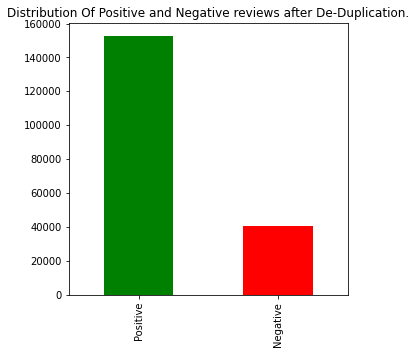

In [112]:
'''Creating a sampled dataset dropping the unwanted columns that we don't need for this problem, from the actual dataset.'''
#Creating a subset of the "final_data" table with randomly selecting 360000 samples
#sampled_dataset = final_data.sample(n=360000, replace=False, random_state=0).reset_index()
#print("\nThe shape of the sampled dataset : ", sampled_dataset.shape)

#Dropping unwanted columns for now.
sampled_dataset=final_data.drop(labels=['ProductId', 'UserId', 'Score', 'category','ProfileName','Helpfullness','Summary'], axis=1)
print("The shape of the sampled dataset after dropping unwanted columns : ", sampled_dataset.shape)

#Sorting data according to Time in ascending order => Time Based Splitting Step 1.
sampled_dataset=sampled_dataset.sort_values('Time', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')
sampled_dataset = sampled_dataset.reset_index()
sampled_dataset=sampled_dataset.drop(labels=['index'], axis=1)

#Display distribution of Postive and Negative reviews in a bar graph
sampled_dataset["Rating"].value_counts().plot(kind='bar',color=['green','red'],title='Distribution Of Positive and Negative reviews after De-Duplication.',figsize=(5,5))
sampled_dataset.head(5)

#Display the first 10 rows of the sampled_dataset (All the reviews are arranged according to time)
print("\nFirst 10 rows of the sampled_dataset.")
sampled_dataset.head(10)

In [114]:
count=0                   #Iterator to iterate through the list of reviews and check if a given review belongs to the positive or negative class
string=' '    
data_corpus=[]
all_positive_words=[] #Store all the relevant words from Positive reviews
all_negative_words=[] #Store all the relevant words from Negative reviews

In [115]:
for review in sampled_dataset['Text'].values:
    filtered_sentence=[]
    sentence=removeHtml(review) #Remove HTMl tags
    for word in sentence.split():
        for cleaned_words in removePunctuations(word).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)): #Checking if a word consists of only alphabets + word length is greater than 2.    
                if(cleaned_words.lower() not in custom_stopwords):
                    stemed_word=(sno.stem(cleaned_words.lower()))
                    filtered_sentence.append(stemed_word)
                    if (sampled_dataset['Rating'].values)[count] == 'Positive': 
                        all_positive_words.append(stemed_word) #List of all the relevant words from Positive reviews
                    if(sampled_dataset['Rating'].values)[count] == 'Negative':
                        all_negative_words.append(stemed_word) #List of all the relevant words from Negative reviews
                else:
                    continue
            else:
                continue 
    string = " ".join(filtered_sentence) #Final string of cleaned words    
    data_corpus.append(string) #Data corpus contaning cleaned reviews from the whole dataset
    count+=1

In [116]:
#Building a data corpus by removing only the Punctuations and HTML tags. Stopwords are preserved. Words are not stemmed. This is useful for Average Word2Vec, TF-IDF W2V.
string=' '    
not_stemmed_corpus=[]
for review in sampled_dataset['Text'].values:
    filtered_sentence=[]
    sentence=removeHtml(review) #Remove HTMl tags
    for word in sentence.split():
        for cleaned_words in removePunctuations(word).split():
            if(cleaned_words.isalpha()): #Checking if a word consists of only alphabets    
                filtered_sentence.append(cleaned_words.lower())
            else:
                continue 
    string = " ".join(filtered_sentence)    
    not_stemmed_corpus.append(string) 
    
#Adding a column of CleanedText to the table final which stores the data_corpus after pre-processing the reviews 
sampled_dataset['CleanedText']=data_corpus 

#Adding a column of PreserveStopwords to the table final which stores the data corpus in which stopwords are preserved and words are not stemmed.  
sampled_dataset['PreserveStopwords']=not_stemmed_corpus 

print("Printing the number of positive and negative reviews after data cleaning.")

Printing the number of positive and negative reviews after data cleaning.


In [117]:
sampled_dataset.head(10)

,Time,Text,Rating,Wordcount,reviewerfrequency,CleanedText,PreserveStopwords
0,997228800,I am continually amazed at the shoddy treatmen...,Negative,144,Not Frequent,continu amaz shoddi treatment movi get dvd rel...,i am continually amazed at the shoddy treatmen...
1,992217600,Michael Keaton brings no distinguishing charac...,Negative,43,Not Frequent,michael keaton bring distinguish characterist ...,michael keaton brings no distinguishing charac...
2,982800000,I don't know why anyone would ever use those l...,Positive,121,Frequent,don know anyon would ever use littl liquid foo...,i don t know why anyone would ever use those l...
3,978134400,"Many movies, have dealt with the figure of dea...",Positive,251,Not Frequent,mani movi dealt figur death dead good angel cl...,many movies have dealt with the figure of deat...
4,977184000,"I THOUGHT THIS MOVIE WAS SO FUNNY, MICHAEL KEA...",Positive,37,Not Frequent,thought movi funni michael keaton beetlejuic r...,i thought this movie was so funny michael keat...
5,975974400,I'm sick of scads of nasty toothpicks all over...,Positive,70,Not Frequent,sick scad nasti toothpick counter tint ice squ...,i m sick of scads of nasty toothpicks all over...
6,970531200,Beetlejuice is an awe-inspiring wonderfully am...,Positive,320,Not Frequent,beetlejuic awe inspir wonder amus comed romp e...,beetlejuice is an awe inspiring wonderfully am...
7,966297600,"This is such a great film, I don't even know h...",Positive,113,Not Frequent,great film don even know sum first complet ori...,this is such a great film i don t even know ho...
8,965779200,"These are easy to use, they do not make a mess...",Positive,38,Not Frequent,easi use not make mess offer vibrant color not...,these are easy to use they do not make a mess ...
9,965779200,This are so much easier to use than the Wilson...,Positive,57,Not Frequent,much easier use wilson past color color vibran...,this are so much easier to use than the wilson...


In [118]:
sampled_dataset['Class_Labels'] = sampled_dataset['Rating'].apply(lambda x : 1 if x == 'Positive' else 0)

In [119]:
sampled_dataset.head()

,Time,Text,Rating,Wordcount,reviewerfrequency,CleanedText,PreserveStopwords,Class_Labels
0,997228800,I am continually amazed at the shoddy treatmen...,Negative,144,Not Frequent,continu amaz shoddi treatment movi get dvd rel...,i am continually amazed at the shoddy treatmen...,0
1,992217600,Michael Keaton brings no distinguishing charac...,Negative,43,Not Frequent,michael keaton bring distinguish characterist ...,michael keaton brings no distinguishing charac...,0
2,982800000,I don't know why anyone would ever use those l...,Positive,121,Frequent,don know anyon would ever use littl liquid foo...,i don t know why anyone would ever use those l...,1
3,978134400,"Many movies, have dealt with the figure of dea...",Positive,251,Not Frequent,mani movi dealt figur death dead good angel cl...,many movies have dealt with the figure of deat...,1
4,977184000,"I THOUGHT THIS MOVIE WAS SO FUNNY, MICHAEL KEA...",Positive,37,Not Frequent,thought movi funni michael keaton beetlejuic r...,i thought this movie was so funny michael keat...,1


In [120]:
sampled_dataset = sampled_dataset.drop(['Wordcount','reviewerfrequency'], axis = 1)
sampled_dataset.head()

,Time,Text,Rating,CleanedText,PreserveStopwords,Class_Labels
0,997228800,I am continually amazed at the shoddy treatmen...,Negative,continu amaz shoddi treatment movi get dvd rel...,i am continually amazed at the shoddy treatmen...,0
1,992217600,Michael Keaton brings no distinguishing charac...,Negative,michael keaton bring distinguish characterist ...,michael keaton brings no distinguishing charac...,0
2,982800000,I don't know why anyone would ever use those l...,Positive,don know anyon would ever use littl liquid foo...,i don t know why anyone would ever use those l...,1
3,978134400,"Many movies, have dealt with the figure of dea...",Positive,mani movi dealt figur death dead good angel cl...,many movies have dealt with the figure of deat...,1
4,977184000,"I THOUGHT THIS MOVIE WAS SO FUNNY, MICHAEL KEA...",Positive,thought movi funni michael keaton beetlejuic r...,i thought this movie was so funny michael keat...,1


##Standerization of the data set

In [121]:
import sklearn.metrics as metrics
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer, CountVectorizer
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_score, recall_score, f1_score

In [122]:
def standardize(X_train_vectors, X_test_vectors):
    '''Function used to column standardize any given matrix'''
    from sklearn.preprocessing import StandardScaler
    scalar = StandardScaler(with_mean=False)
    scalar.fit(X_train_vectors)
    X_train_vectors = scalar.transform(X_train_vectors)
    X_test_vectors = scalar.transform(X_test_vectors)
    print("The shape of the X_train_vectors is : {}".format(X_train_vectors.shape))
    print("The shape of the X_test_vectors is : {}".format(X_test_vectors.shape))
    return (X_train_vectors, X_test_vectors)

def top_features(nb_classifier, vectorizer_object):
    '''Get top 50 features displayed from both the negative and the positive review classes.'''
    neg_class_prob_sorted = (-nb_classifier.feature_log_prob_[0, :]).argsort()               #Note : Putting a - sign indicates the indexes will be sorted in descending order.
    pos_class_prob_sorted = (-nb_classifier.feature_log_prob_[1, :]).argsort()
    neg_class_features = np.take(vectorizer_object.get_feature_names(), neg_class_prob_sorted[:50])
    pos_class_features = np.take(vectorizer_object.get_feature_names(), pos_class_prob_sorted[:50])
    print("The top 50 most frequent words from the positive class are :\n")
    print(pos_class_features)
    print("\nThe top 50 most frequent words from the negative class are :\n")
    print(neg_class_features)
    del(neg_class_prob_sorted, pos_class_prob_sorted, neg_class_features, pos_class_features)

def performance(nb_classifier, vectorizationType, X_train, y_train, X_test, y_test, optimal_alpha, mse): #MSE : Mean Squared Loss
    '''Function to measure the various performance metrics for a given model.'''
    print("\n'''PERFORMANCE EVALUATION'''")
    print("\n\nDetailed report for the {} Vectorization.".format(vectorizationType))

    #Predict the labels for the test set.
    y_pred = nb_classifier.predict(X_test)
    
    #Evaluate the accuracy of the model on test set
    test_accuracy = accuracy_score(y_test, y_pred, normalize=True) * 100
    points = accuracy_score(y_test, y_pred, normalize=False)
    print('\nThe number of accurate predictions out of {} data points on unseen data is {}'.format(X_test.shape[0], points))
    print('Accuracy of the {} model on unseen data is {} %'.format(vectorizationType, np.round(test_accuracy,2)))
    
    #Get the precision, recall and F1 score for this model.
    print("Precision of the {} model on unseen data is {}".format(vectorizationType, np.round(metrics.precision_score(y_test ,y_pred),4)))
    print("Recall of the {} model on unseen data is {}".format(vectorizationType, np.round(metrics.recall_score(y_test ,y_pred),4)))
    print("F1 score of the {} model on unseen data is {}".format(vectorizationType, np.round(metrics.f1_score(y_test ,y_pred),4)))
    
    #Classification Report
    print ('\nClasification report for {} model : \n'.format(vectorizationType))
    print(metrics.classification_report(y_test,y_pred))
    
    #Print the Conclusions on the trained dataset
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    p = tp+fn #p = total number of actual postives
    n = fp+tn #p = total number of actual negatives
    TPR = tp/p ; TNR = tn/n ; FPR = fp/n ; FNR = fn/p
    print("\nThe True Positives Rate is : {}".format(TPR))
    print("The True Negatives Rate is : {}".format(TNR))
    print("The False Positives Rate is : {}".format(FPR))
    print("The False Negatives Rate is : {}".format(FNR))
    
    #Inference
    print("\nOf all the reviews that the model has predicted to be positive, {}% of them are actually positive.".format(np.round(metrics.precision_score(y_test ,y_pred)*100,2)))
    print("Of all the reviews that are actually positive, the model has predicted {}% of them to be positive.".format(np.round(metrics.recall_score(y_test ,y_pred)*100,2)))
      
    #Save the below list for later use to display model information
    info_model_NB = [vectorizationType, optimal_alpha, np.round(np.array(mse).mean(),4), np.round(1-metrics.accuracy_score(y_test, y_pred),4), np.round(metrics.f1_score(y_test ,y_pred),4), points]
    with open('info_model_NB.txt', 'a') as filehandle:  
        filehandle.writelines("%s " % iterator for iterator in info_model_NB)
        filehandle.writelines("\n")
        
    #Get the confusion matrix for the running model
    print("\nFind below the confusion matrix for {} model.".format(vectorizationType))
    cf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Dark2')
    
    #Free memory allocations
    del(X_train, y_train, X_test, y_test, vectorizationType, y_pred, nb_classifier)
       
def get_GridSearchCV_estimator(vectorizationType, X_train, y_train, X_test, y_test):
    '''This function will determine the best hyperparameters using TimeSeriesSplit CV and Grid Search, using 10 fold cross validation. '''
    from sklearn.model_selection import TimeSeriesSplit
    alphas = np.logspace(-5, 4, 100)
    tuned_parameters = [{'alpha': alphas}]
    n_folds = 10
    model = MultinomialNB()
    my_cv = TimeSeriesSplit(n_splits=n_folds).split(X_train)
    gsearch_cv = GridSearchCV(estimator=model, param_grid=tuned_parameters, cv=my_cv, scoring='f1', n_jobs=6)
    gsearch_cv.fit(X_train, y_train)
    print("\nGridSearchCV completed for {} model!".format(vectorizationType))
    print("Best estimator for {} model : ".format(vectorizationType), gsearch_cv.best_estimator_)
    print("Best Score for {} model : ".format(vectorizationType), gsearch_cv.best_score_)
    return gsearch_cv
    
def plot_errors(gsearch_cv):
    '''This function is used to plot the curve for mean squared errors vs alpha values'''
    #Get cross validation scores. Here we obtain the alpha values and their corresponding mean test scores.
    cv_result = gsearch_cv.cv_results_         
    mts = cv_result["mean_test_score"]        #list that will hold the mean of cross validation accuracy scores for each alpha
    alphas = cv_result["params"]

    alpha_values = []                         #list that will hold all the alpha values that the grid search cross validator tried.
    for i in range(0,len(alphas)):
        alpha_values.append(alphas[i]["alpha"])

    #Changing accuracy to mean squared error. **error = 1 - accuracy ; error = Cross Validation Errors, accuracy = Cross Validation accuracy
    mse = [1 - x for x in mts]

    #Determining best alpha from errors. 'alpha' will be best for the lowest value for error
    optimal_alpha = alpha_values[mse.index(min(mse))] #Laplace smoothing
    print('The optimal value of alpha is : {}'.format(optimal_alpha))     

    #Plot error vs alpha values
    plt.figure(figsize=(35,8))
    plt.plot(alpha_values , mse, color='green', linestyle='dashed', linewidth=2, marker='o', markerfacecolor='red', markersize=10)
    for xy in zip(alpha_values, np.round(mse,3)):
        plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
    plt.title('Plot for Errors vs Alpha Values')
    plt.xlabel('Values of Alpha')
    plt.ylabel('Errors')
    plt.show()
    
    return (optimal_alpha,mse)
    
def naive_bayes_algorithm(X_train, y_train, X_test, y_test, vectorizationType, vectorizer_object):
    '''This function splits the dataset into training set and test sets. The test data remains untouched.
    A time series 10 fold cross validation is performed on the train data and the value of optimal alpha is calculated. 
    The dataset is then trained with this value of optimal alpha. 
    Finally the Naive Bayes model is used to predict its accuracy on the future unseen test set.'''
    
    #Perform 10-fold cross validation on the train set
    print("Starting Cross Validation steps...")
    gsearch_cv = get_GridSearchCV_estimator(vectorizationType, X_train, y_train, X_test, y_test)
    
    #Plot the graphical representation of the mean squared error vs the alpha values obtained during cross validation.
    optimal_alpha, mse = plot_errors(gsearch_cv)

    #Initialize the Naive Bayes constructor using alpha = optimal_alpha
    nb_classifier = gsearch_cv.best_estimator_

    #Fit the model to the train set using optimal alpha
    nb_classifier.fit(X_train, y_train)
    
    #Display the top features of both the negative and positive reviews
    top_features(nb_classifier, vectorizer_object)
    
    #Evaluate the model's performance
    performance(nb_classifier, vectorizationType, X_train, y_train, X_test, y_test, optimal_alpha, mse)


###Naive Bayes on the Bag of Words model created using 'CleanedText'.


Creating the BOW vectors using the cleaned corpus
The shape of the X_train_vectors is : (154414, 50871)
The shape of the X_test_vectors is : (38604, 50871)
Starting Cross Validation steps...

GridSearchCV completed for Bag-of-Words model!
Best estimator for Bag-of-Words model :  MultinomialNB(alpha=10000.0)
Best Score for Bag-of-Words model :  0.8752733965687394
The optimal value of alpha is : 10000.0


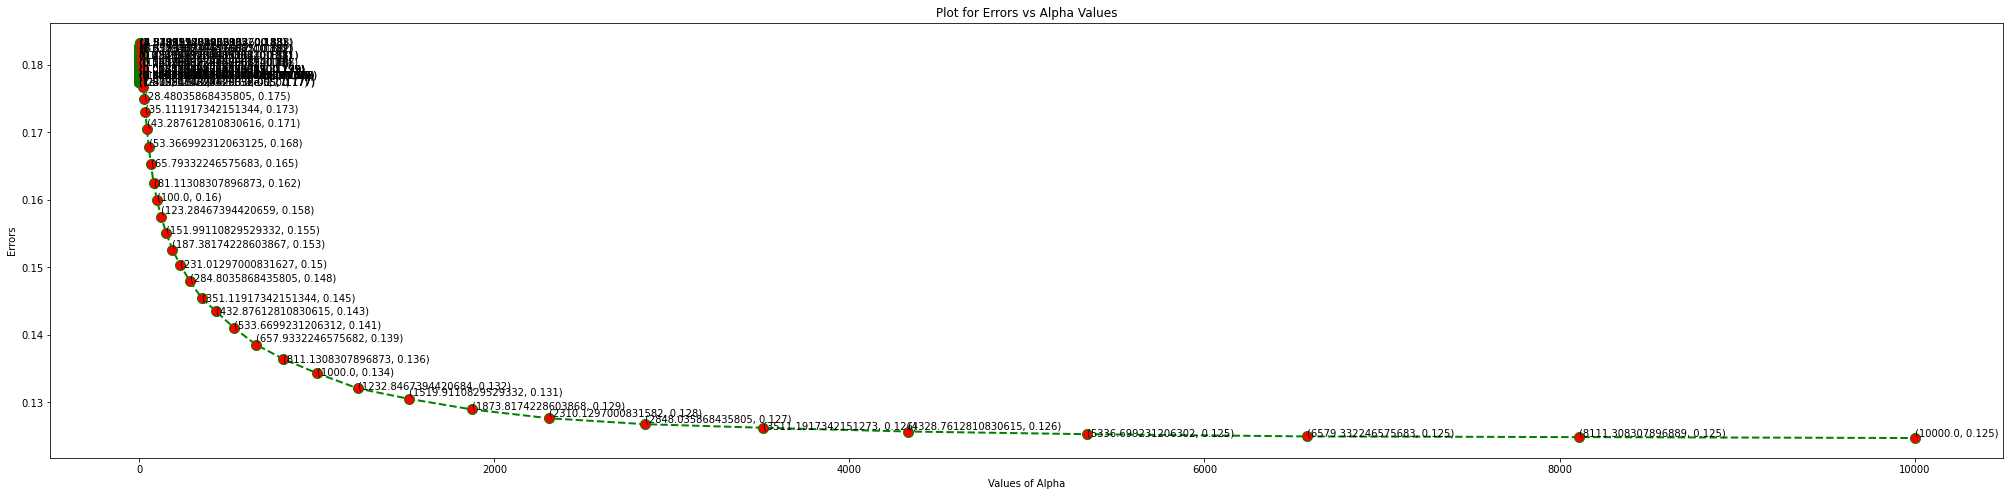

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


The top 50 most frequent words from the positive class are :

['great' 'love' 'good' 'like' 'not' 'tast' 'use' 'tri' 'one' 'make'
 'flavor' 'get' 'best' 'product' 'time' 'find' 'also' 'buy' 'realli'
 'much' 'littl' 'price' 'well' 'store' 'recommend' 'would' 'amazon' 'don'
 'eat' 'better' 'even' 'delici' 'year' 'high' 'found' 'order' 'day'
 'favorit' 'enjoy' 'need' 'perfect' 'nice' 'give' 'want' 'first' 'work'
 'keep' 'way' 'sinc' 'bit']

The top 50 most frequent words from the negative class are :

['not' 'tast' 'product' 'like' 'disappoint' 'would' 'buy' 'one' 'tri'
 'bad' 'even' 'money' 'order' 'return' 'don' 'get' 'bought' 'thought'
 'look' 'review' 'purchas' 'wast' 'receiv' 'flavor' 'good' 'amazon'
 'packag' 'box' 'could' 'know' 'didn' 'want' 'much' 'worst' 'first' 'time'
 'say' 'think' 'away' 'got' 'never' 'item' 'someth' 'terribl' 'use'
 'horribl' 'aw' 'realli' 'made' 'open']

'''PERFORMANCE EVALUATION'''


Detailed report for the Bag-of-Words Vectorization.

The number of accura

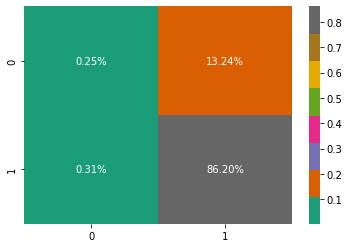

In [123]:
'''Creating the Bag of Words vector for the cleaned reviews.'''
#Bag of Words model creation using cleaned text 


#Split the data set into train and test sets. The test set should be unseen. Time Based Splitting Step 2.
#The top old 80% data will get into the train set. The latest 20% data will get into the test set.
X = sampled_dataset['CleanedText']
y = sampled_dataset['Class_Labels']
split = math.floor(0.8*len(X))
X_train = X[0:split,] ; y_train = y[0:split,]
X_test = X[split:,] ; y_test = y[split:,]

#Initializing the BOW constructor
cv_object = CountVectorizer().fit(X_train)

#Creating the BOW matrix from cleaned data corpus. Only 'not' is preserved from stopwords. This is done for both train and test Vectors.
print("\nCreating the BOW vectors using the cleaned corpus")
X_train_vectors = cv_object.transform(X_train)
X_test_vectors = cv_object.transform(X_test)

#Colum Standardization of the Bag of Words vector created using cleaned data. This is done for both train and test Vectors.
X_train_vectors, X_test_vectors = standardize(X_train_vectors, X_test_vectors)

#Fitting the Naive Bayes to the BOW model
naive_bayes_algorithm(X_train_vectors, y_train, X_test_vectors, y_test, "Bag-of-Words", cv_object)


###Naive Bayes on the Bigrams model created using 'PreserveStopwords':
A bigram or digram is a sequence of two adjacent elements from a string of tokens, which are typically letters, syllables, or words. A bigram is an n-gram for n=2. The frequency distribution of every bigram in a string is commonly used for simple statistical analysis of text in many applications, including in computational linguistics, cryptography, speech recognition, and so on. In a bigram representation of sentences the relationship between two adjacent words are taken into consideration along with single words.


Creating the BOW vectors using PreserveStopwords corpus
The shape of the X_train_vectors is : (154414, 1871607)
The shape of the X_test_vectors is : (38604, 1871607)
Starting Cross Validation steps...


/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



GridSearchCV completed for Bi-Grams model!
Best estimator for Bi-Grams model :  MultinomialNB(alpha=2310.1297000831582)
Best Score for Bi-Grams model :  0.8911842707493953
The optimal value of alpha is : 2310.1297000831582


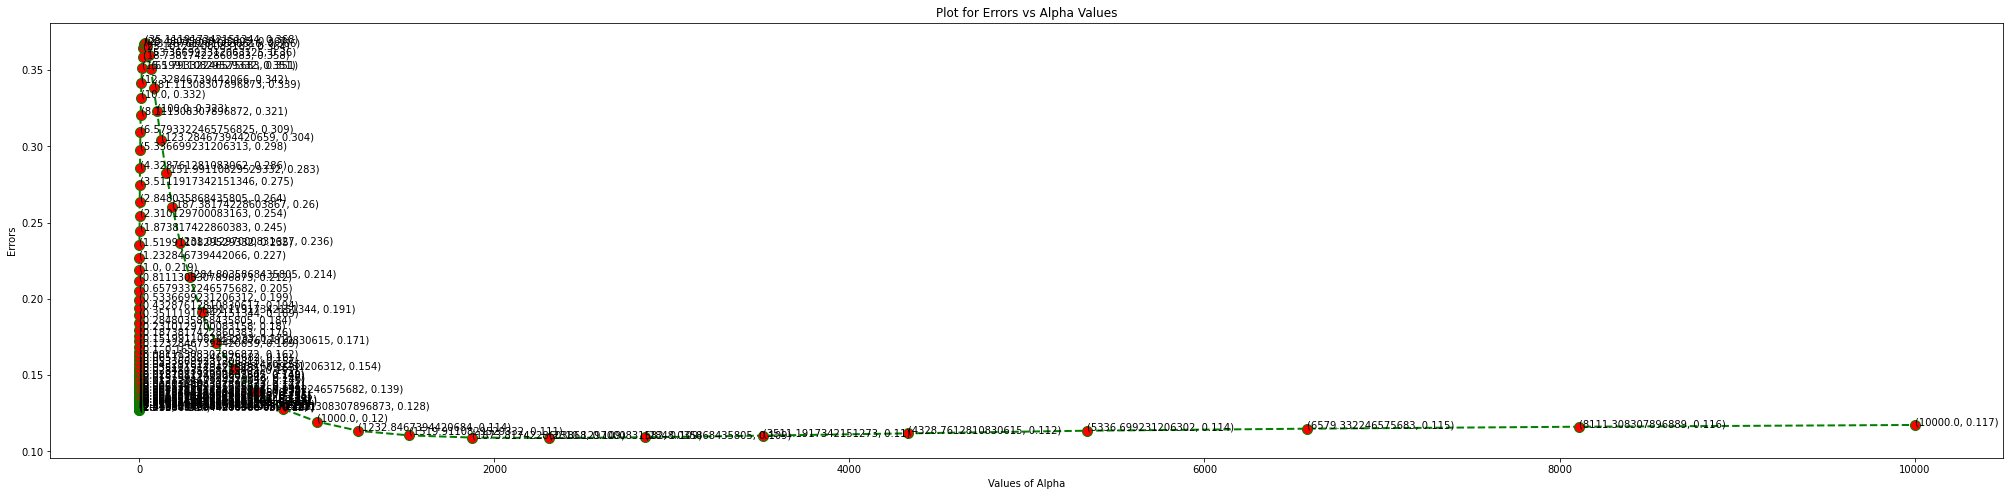

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


The top 50 most frequent words from the positive class are :

['and' 'the' 'to' 'this' 'it' 'is' 'of' 'for' 'in' 'my' 'with' 'but'
 'that' 'have' 'on' 'you' 'so' 'are' 'as' 'great' 'good' 'not' 'like'
 'they' 'can' 'or' 'at' 'was' 'just' 'be' 'these' 'very' 'if' 'one' 'all'
 'love' 'this is' 'when' 'more' 'has' 'from' 'taste' 'them' 'of the'
 'in the' 'than' 'will' 'it is' 'flavor' 'me']

The top 50 most frequent words from the negative class are :

['the' 'and' 'this' 'to' 'not' 'of' 'it' 'but' 'was' 'is' 'that' 'in'
 'for' 'like' 'be' 'my' 'have' 'with' 'product' 'on' 'had' 'would' 'taste'
 'they' 'from' 'if' 'of the' 'so' 'all' 'at' 'what' 'you' 'just' 'one'
 'as' 'were' 'no' 'are' 'out' 'there' 'even' 'it was' 'disappointed' 'bad'
 'in the' 'don' 'these' 'money' 'when' 'will']

'''PERFORMANCE EVALUATION'''


Detailed report for the Bi-Grams Vectorization.

The number of accurate predictions out of 38604 data points on unseen data is 34150
Accuracy of the Bi-Grams model on unseen da

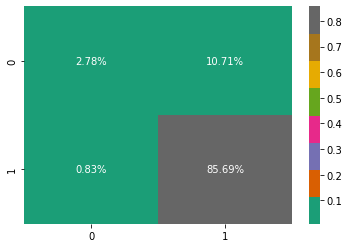

In [124]:
'''Bi Grams model creation using text reviews. HTML tags and punctuations are removed. All stopwords are preserved.'''

#Split the data set into train and test sets. The test set should be unseen. Time Based Splitting Step 2.
#The top old 80% data will get into the train set. The latest 20% data will get into the test set.
X = sampled_dataset['PreserveStopwords']
y = sampled_dataset['Class_Labels']
split = math.floor(0.8*len(X))
X_train = X[0:split,] ; y_train = y[0:split,]
X_test = X[split:,] ; y_test = y[split:,]

#Initializing the TF-IDF contructor
bigrams_object = TfidfVectorizer(ngram_range=(1,2)).fit(X_train)

#Creating the BOW matrix from cleaned data corpus. Only 'not' is preserved from stopwords. This is done for both train and test Vectors.
print("\nCreating the BOW vectors using PreserveStopwords corpus")
X_train_vectors = bigrams_object.transform(X_train)
X_test_vectors = bigrams_object.transform(X_test)

#Colum Standardization of the T-gram vector created using preserved stopwords data. This is done for both train and test Vectors.
X_train_vectors, X_test_vectors = standardize(X_train_vectors, X_test_vectors)

#Fitting the Naive Bayes to the BOW model
naive_bayes_algorithm(X_train_vectors, y_train, X_test_vectors, y_test, "Bi-Grams", bigrams_object)


###Naive Bayes on the Tri-grams model created using 'PreserveStopwords':
Trigrams are a special case of the n-gram, where n is 3. They are often used in natural language processing for performing statistical analysis of texts and in cryptography for control and use of ciphers and codes. For this below code, the relationship between two and three adjacent words are taken into consideration. Single words are omitted.


Creating the BOW vectors using PreserveStopwords corpus
The shape of the X_train_vectors is : (154414, 8035730)
The shape of the X_test_vectors is : (38604, 8035730)
Starting Cross Validation steps...


/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



GridSearchCV completed for Tri-Grams model!
Best estimator for Tri-Grams model :  MultinomialNB(alpha=1e-05)
Best Score for Tri-Grams model :  0.885858021717147
The optimal value of alpha is : 1e-05


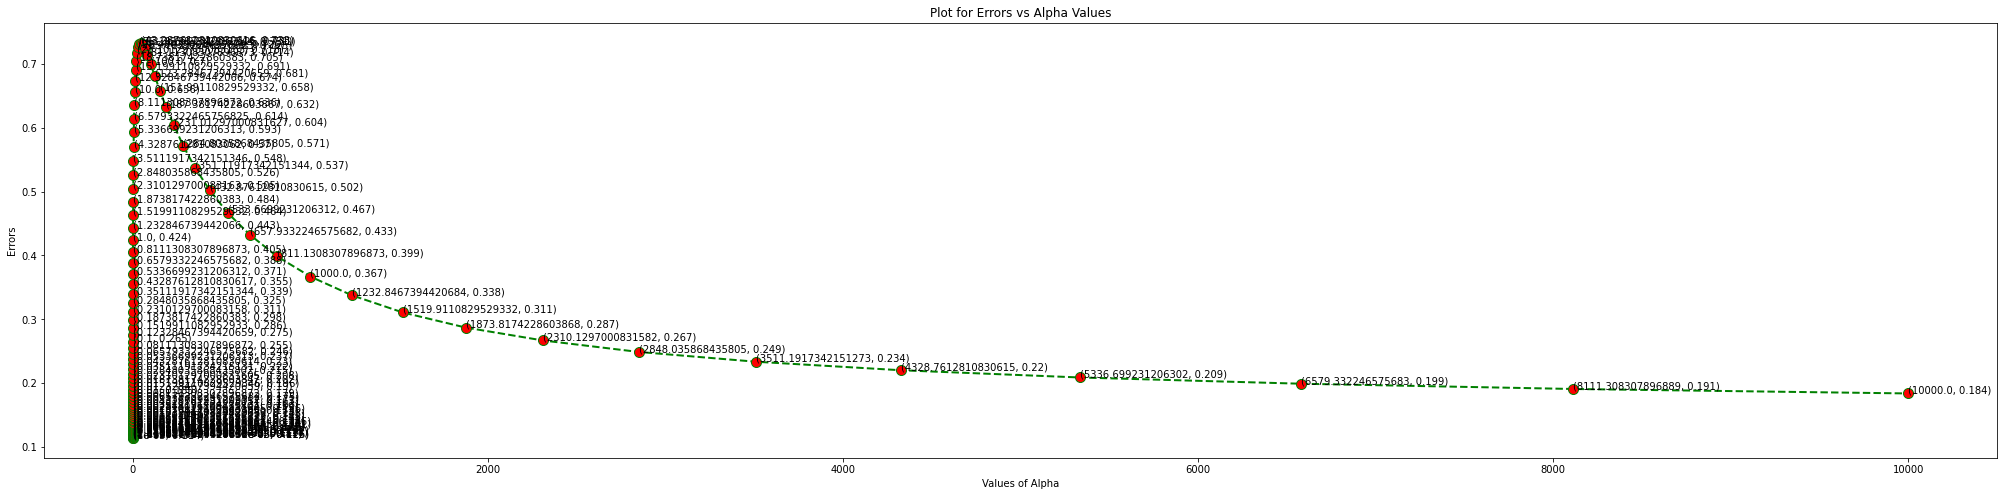

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


The top 50 most frequent words from the positive class are :

['this is' 'of the' 'in the' 'it is' 'if you' 'the best' 'and the'
 'is the' 'and it' 'on the' 'they are' 'for the' 'to the' 'this product'
 'to be' 'with the' 'in my' 'you can' 'it was' 'to find' 'is great'
 'have to' 'to make' 'the price' 'one of' 'it in' 'these are' 'but it'
 'for my' 'it has' 'to get' 'and they' 'at the' 'of this' 'is very'
 'all the' 'have been' 'this is the' 'the only' 'love this' 'the taste'
 'that it' 'as well' 'like the' 'from the' 'and have' 'on amazon'
 'my favorite' 'better than' 'it to']

The top 50 most frequent words from the negative class are :

['of the' 'it was' 'in the' 'this product' 'is not' 'on the' 'at all'
 'to be' 'did not' 'do not' 'would not' 'very disappointed' 'to the'
 'the same' 'the product' 'will not' 'not buy' 'if you' 'it is'
 'the worst' 'and the' 'was not' 'this is' 'would be' 'your money'
 'but the' 'had to' 'for the' 'the box' 'of this' 'that the' 'the taste'
 'the fir

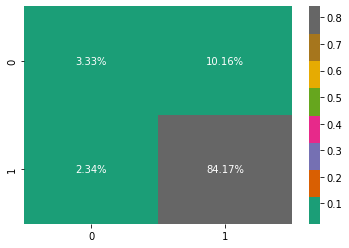

In [125]:
'''Tri-Grams model creation using text reviews. HTML tags and punctuations are removed. All stopwords are preserved.
This model won't contain single words. This will mostly try to figure out the relationships between consecutive words in a sentences '''


#Split the data set into train and test sets. The test set should be unseen. Time Based Splitting Step 2.
#The top old 80% data will get into the train set. The latest 20% data will get into the test set.
X = sampled_dataset['PreserveStopwords']
y = sampled_dataset['Class_Labels']
split = math.floor(0.8*len(X))
X_train = X[0:split,] ; y_train = y[0:split,]
X_test = X[split:,] ; y_test = y[split:,]

#Initializing the TF-IDF contructor
tri_grams_object = TfidfVectorizer(ngram_range=(2,3)).fit(X_train)

#Creating the BOW matrix from cleaned data corpus. Only 'not' is preserved from stopwords. This is done for both train and test Vectors.
print("\nCreating the BOW vectors using PreserveStopwords corpus")
X_train_vectors = tri_grams_object.transform(X_train)
X_test_vectors = tri_grams_object.transform(X_test)

#Colum Standardization of the tri-gram vector created using preserved stopwords data. This is done for both train and test Vectors.
X_train_vectors, X_test_vectors = standardize(X_train_vectors, X_test_vectors)


#Fitting the Naive Bayes to the BOW model
naive_bayes_algorithm(X_train_vectors, y_train, X_test_vectors, y_test, "Tri-Grams", tri_grams_object)

#Conclusion

In [127]:
#Compare performance and display it on a pretty table.
from prettytable import PrettyTable
table = PrettyTable()
table.field_names = ["Model", " Hyper-Parameter Value (alpha=)", "Train Error", "Test Error", "F1-Score", "No. Of accurate predictions"]

print("Please find below the important metrics for all the models below.\n")
file = open('info_model_NB.txt', 'r')
file.seek(0)
for line in file:
    table.add_row(line.split())
print(table)

Please find below the important metrics for all the models below.

+--------------+---------------------------------+-------------+------------+----------+-----------------------------+
|    Model     |  Hyper-Parameter Value (alpha=) | Train Error | Test Error | F1-Score | No. Of accurate predictions |
+--------------+---------------------------------+-------------+------------+----------+-----------------------------+
| Bag-of-Words |             10000.0             |    0.1692   |   0.1355   |  0.9271  |            33373            |
|   Bi-Grams   |        2310.1297000831582       |    0.1868   |   0.1154   |  0.9369  |            34150            |
|  Tri-Grams   |              1e-05              |    0.3339   |   0.125    |  0.9309  |            33780            |
+--------------+---------------------------------+-------------+------------+----------+-----------------------------+
